In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from parse_database import read_header_database, parse_header_database, VarRange

In [2]:
file_database = '../databases/Tcritical.csv'

header = read_header_database(file_database)
Trange, comp_range = parse_header_database(header)

comp_range

OrderedDict([('C', <parse_database.VarRange at 0x7f8899b486d8>),
             ('Mn', <parse_database.VarRange at 0x7f8899b48828>),
             ('Si', <parse_database.VarRange at 0x7f8899b48898>),
             ('Cr', <parse_database.VarRange at 0x7f8899b48908>),
             ('Ni', <parse_database.VarRange at 0x7f8899b48978>)])

In [3]:
print(comp_range['C'].min,
      comp_range['C'].max, 
      comp_range['C'].step,
      comp_range['C'].lvls)

0.0 0.015 0 11


In [4]:
newshape = (comp_range['C'].lvls, comp_range['Mn'].lvls, 
            comp_range['Si'].lvls, comp_range['Cr'].lvls, 
            comp_range['Ni'].lvls)

print(newshape)

(11, 5, 5, 5, 5)


In [5]:
dataset = pd.read_csv(file_database, comment='#')
dataset.head()

,file,macro,C,Mn,Si,Cr,Ni,A1,A1prime,A3,eutectoid
0,../results/00000.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.000001,NaN,NaN,1184.80,hipo
1,../results/00001.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.007501,NaN,NaN,1153.41,hipo
2,../results/00002.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.015000,NaN,NaN,1126.40,hipo
3,../results/00003.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.022500,NaN,NaN,1102.75,hipo
4,../results/00004.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.030000,NaN,NaN,1081.80,hipo


In [6]:
dataset_multidim = OrderedDict()

dataset_multidim['C'] = dataset['C'].values.reshape(newshape)
dataset_multidim['Mn'] = dataset['Mn'].values.reshape(newshape)
dataset_multidim['Si'] = dataset['Si'].values.reshape(newshape)
dataset_multidim['Cr'] = dataset['Cr'].values.reshape(newshape)
dataset_multidim['Ni'] = dataset['Ni'].values.reshape(newshape)
dataset_multidim['A1'] = dataset['A1'].values.reshape(newshape)
dataset_multidim['A3'] = dataset['A3'].values.reshape(newshape)
dataset_multidim['A1prime'] = dataset['A1prime'].values.reshape(newshape)

dataset_multidim['C'].shape

(11, 5, 5, 5, 5)

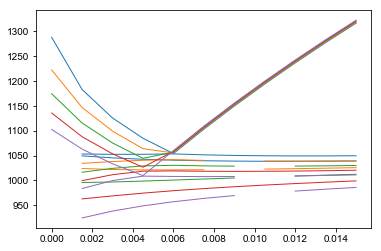

In [15]:
Si, Cr, Ni = 2, 2, 0

fig, ax = plt.subplots()
for Mn in range(comp_range['Mn'].lvls):
    line, = plt.plot(dataset_multidim['C'][:,Mn,Si,Cr,Ni], dataset_multidim['A3'][:,Mn,Si,Cr,Ni])
    color = line.get_color()
    plt.plot(dataset_multidim['C'][:,Mn,Si,Cr,Ni], dataset_multidim['A1prime'][:,Mn,Si,Cr,Ni], color=color)
    plt.plot(dataset_multidim['C'][:,Mn,Si,Cr,Ni], dataset_multidim['A1'][:,Mn,Si,Cr,Ni], color=color)
